In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics


from sklearn.decomposition import TruncatedSVD

In [2]:
try:
    import xgboost
except ImportError as ex:
    print("Error: the xgboost library is not installed.")
    xgboost = None

Error: the xgboost library is not installed.


In [3]:
import numpy as np
import os 


to_remove= ('headers', 'footers', 'quotes')

from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='all', shuffle=True, remove = to_remove)

# Uwaga

Zmniejszam zbiór danych biorąc okresloną ilość danych z każdej klasy

5 klas po 500 elementów

In [4]:
data = []
for j in range(len(newsgroups_train.target_names)):
    data.append([newsgroups_train.data[i] for i in range(newsgroups_train.target.shape[0]) if newsgroups_train.target[i] == j])

In [25]:
#biore okreslona ilosc danych z kazdej klasy

categories = 5
num=500
X_set = []
Y_set =[]
for i in range(categories):
    X_set = X_set + data[i][:num]
    Y_set = Y_set + [i]*num

# Zad

Znajdź najlepszy model dla 20newsgroups wykonując GridSearch dla modeli:

* MultinomialNB (bez redukcji wymiarowości)
* LogisticRegression
* LinearSVC
* SVC
* KNeighborsClassifier
* DecisionTreeClassifier
* RandomForestClassifier
* BaggingClassifier
* ExtraTreesClassifier
* AdaBoostClassifier
* GradientBoostingClassifier
* VotingClassifier
* xgboost.XGBClassifier

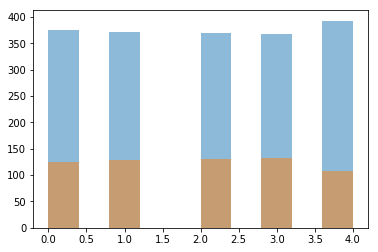

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_set, Y_set, test_size=0.25, random_state=33)

plt.hist(y_train, alpha=0.5)
plt.hist(y_test, alpha=0.5)
plt.show()

In [27]:
from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=5, random_state=seed)

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.naive_bayes import MultinomialNB

    
pipe = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB()),
])

param_grid = {
            'vectorizer': [TfidfVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10), 
                           CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)]
}

grid_0 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)

grid_0.fit(X_train, y_train)
grid_0.best_params_


{'vectorizer': TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=0.5, max_features=None, min_df=10,
         ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
         stop_words='english', strip_accents='unicode', sublinear_tf=False,
         token_pattern='\\b[a-zA-Z]{3,}\\b', tokenizer=None, use_idf=True,
         vocabulary=None)}

In [29]:
from sklearn import  metrics


models = []
models.append(('NB', grid_0.best_estimator_))
# models.append(('SVM linear', grid_1.best_estimator_))
# models.append(('SVM rbf', grid_2.best_estimator_))
# models.append(('LR', grid_3.best_estimator_))
# models.append(('KNN', grid_4.best_estimator_))
# models.append(('DecisionTreeClassifier', grid_5.best_estimator_))
# models.append(('BaggingClassifier', grid_6.best_estimator_))
# models.append(('RandomForestClassifier', grid_7.best_estimator_))
# models.append(('ExtraTreesClassifier', grid_8.best_estimator_))
# models.append(('AdaBoostClassifier', grid_9.best_estimator_))
# models.append(('GradientBoostingClassifier', grid_10.best_estimator_))
# models.append(('XGBClassifier', grid_11.best_estimator_))
# models.append(('voting_clf', voting_clf))
# models.append(('XGBClassifier r2', grid_12.best_estimator_))

precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
roc_auc_score = []
for name, model in models:
    print(name)
    print("precision_score: {}".format(metrics.precision_score(y_test , model.predict(X_test), average='weighted') ))
    print("recall_score: {}".format( metrics.recall_score(y_test , model.predict(X_test), average='weighted') ))
    print("f1_score: {}".format( metrics.f1_score(y_test , model.predict(X_test), average='weighted') ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test , model.predict(X_test)) ))
    

    precision_score.append(metrics.precision_score(y_test , model.predict(X_test), average='weighted') )
    recall_score.append(metrics.recall_score(y_test , model.predict(X_test), average='weighted') )
    f1_score.append( metrics.f1_score(y_test , model.predict(X_test), average='weighted') )
    accuracy_score.append(metrics.accuracy_score(y_test , model.predict(X_test)))


NB
precision_score: 0.7341968549558728
recall_score: 0.7248
f1_score: 0.7265024724417711
accuracy_score: 0.7248


In [30]:
import pandas as pd
d = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['NB'])
# df.insert(loc=0, column='Method', value=['NB', 'SVM linear','SVM rbf','LR','KNN','DecisionTreeClassifier','BaggingClassifier','RandomForestClassifier','ExtraTreesClassifier', 'AdaBoostClassifier','GradientBoostingClassifier','XGBClassifier','voting','XGBClassifier r'])
df

,Method,precision_score,recall_score,f1_score,accuracy_score
0,NB,0.734197,0.7248,0.726502,0.7248
